In [ ]:
# Import required libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import torchvision
import numpy as np
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [ ]:
torch.manual_seed(0)


In [ ]:
# input layer, a single hidden layer, and an output layer
# Define hyperparameters
input_size = 784  # 28x28 pixels
hidden_size = 128
num_classes = 10

#tip to choose to size of hidden layer
#There is no thumb rule however hidden layers depend numbers of feature it has to learn, you can start with 1 and optimize and move forward.

batch_size = 100

In [ ]:
img = torchvision.datasets.MNIST(root='../data', train=True, download=True)[0]

In [ ]:
# Load MNIST dataset
transform = transforms.Compose(
    [
        transforms.ToTensor(),   # convert to pytorch tensor
     transforms.Normalize((0.1307,), (0.3081,))]  # standardize the values with mean + std
)


train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


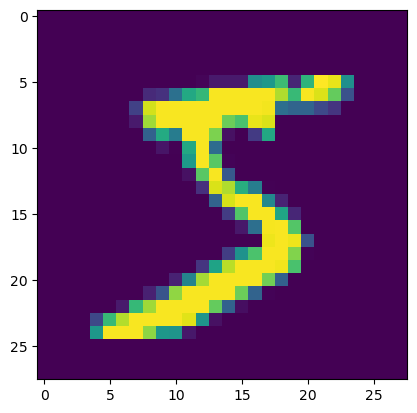

In [ ]:
# transpose the array to (28, 28) format expected by Matplotlib
array = np.squeeze(np.transpose(train_dataset[0][0], (1, 2, 0)))

# plot the image using Matplotlib
plt.imshow(array)
plt.show()



In [ ]:
next(iter(test_loader))[0].shape # we have 100 images with 1,28,28

torch.Size([100, 1, 28, 28])

In [ ]:
# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() #most common activation function with GPT 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Create the model
model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# Loss function options
cross_entropy_loss = nn.CrossEntropyLoss()
nll_loss = nn.NLLLoss()
mse_loss = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [ ]:
# Function to train the model
def train_model(model, loss_function, train_loader, optimizer, num_epochs=10):
    # Put the model in training mode
    model.train()
    
    # Iterate over the number of epochs
    for epoch in range(num_epochs):
        # Initialize the running loss for this epoch to zero
        running_loss = 0.0
        
        # Iterate over each batch in the training loader
        for i, (images, labels) in enumerate(train_loader):
            
            # Reshape the images tensor to have size (batch_size, input_size)
            images = images.reshape(-1, input_size)
            # Forward pass: compute the outputs of the model given the input images
            outputs = model(images)
            # Compute the loss between the outputs and the true labels
            loss = loss_function(outputs, labels)
            # Backward pass: compute the gradients of the loss with respect to the model parameters
            optimizer.zero_grad()
            loss.backward()
            # Update the model parameters using the optimizer
            optimizer.step()
            
            # Add the current batch loss to the running loss for this epoch
            running_loss += loss.item()

        # Compute the average loss over all batches for this epoch and print it
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


In [ ]:
# Function to evaluate the model
def evaluate_model(model, test_loader):
    # Put the model in evaluation mode
    model.eval()
    
    # Initialize empty lists to store true and predicted labels
    y_true, y_pred = [], []
    
    # Disable gradient computation since we're only evaluating the model
    with torch.no_grad():
        # Iterate over each batch in the test loader
        for images, labels in test_loader:
            # Reshape the images tensor to have size (batch_size, input_size)
            images = images.reshape(-1, input_size)
            
            # Forward pass: compute the outputs of the model given the input images
            outputs = model(images)
            
            # Find the predicted class for each image in the batch
            _, predicted = torch.max(outputs.data, 1)
            
            # Append the true and predicted labels for this batch to the lists
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    # Calculate evaluation metrics using the true and predicted labels
    accuracy, f1, precision, recall = evaluate_model_metrics(np.array(y_true), np.array(y_pred))
    
    # Return the evaluation metrics
    return accuracy, f1, precision, recall

# Function to calculate evaluation metrics
def evaluate_model_metrics(y_true, y_pred):
    # Compute the accuracy, F1 score, precision, and recall
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Return the evaluation metrics
    return accuracy, f1, precision, recall

# Define a dictionary of loss functions
loss_functions = {
    'CrossEntropyLoss': nn.CrossEntropyLoss(),
    'NLLLoss': nn.NLLLoss(),
}


In [ ]:
# Train and evaluate the model using different loss functions
for loss_name, loss_function in loss_functions.items():
    print(f'Training with {loss_name}:')
    
    # Initialize a new model and optimizer for each loss function
    model = NeuralNet(input_size, hidden_size, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    train_model(model, loss_function, train_loader, optimizer, num_epochs=10)

    # Evaluate the model
    accuracy, f1, precision, recall = evaluate_model(model, test_loader)
    print(f'Performance metrics for {loss_name}:')
    print(f'Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n')


Training with CrossEntropyLoss:
Epoch [1/10], Loss: 0.2845
Epoch [2/10], Loss: 0.1248
Epoch [3/10], Loss: 0.0850
Epoch [4/10], Loss: 0.0631
Epoch [5/10], Loss: 0.0513
Epoch [6/10], Loss: 0.0399
Epoch [7/10], Loss: 0.0323
Epoch [8/10], Loss: 0.0272
Epoch [9/10], Loss: 0.0225
Epoch [10/10], Loss: 0.0220
Performance metrics for CrossEntropyLoss:
Accuracy: 0.9767, F1-score: 0.9766, Precision: 0.9766, Recall: 0.9767

Training with NLLLoss:
Epoch [1/10], Loss: -11812.1983
Epoch [2/10], Loss: -84332.6273
Epoch [3/10], Loss: -219235.6355
Epoch [4/10], Loss: -405894.0463
Epoch [5/10], Loss: -638261.7497
Epoch [6/10], Loss: -911766.3699
Epoch [7/10], Loss: -1222908.0429
Epoch [8/10], Loss: -1569687.2360
Epoch [9/10], Loss: -1950855.6594
Epoch [10/10], Loss: -2365668.1362
Performance metrics for NLLLoss:
Accuracy: 0.1135, F1-score: 0.0204, Precision: 0.0114, Recall: 0.1000



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
